# 신경망 학습_01 - 손실함수, 경사하강법

* 학습: 학습(training) 데이터 → 매개변수(**W**, 가중치와 편향) 최적화
* 최적화: 오차(Loss)를 줄이기 위해 가중치(W), 편향(b)와 같은 매개변수들을 계속 바꾸어 나가는 과정

1. 추론값(**y**)과 레이블(**t**)을 비교하여 오차(**L**)를 구한 다음, 이 오차가 감소하도록 매개변수 최적화
2. 매개변수의 변화에 따른 오차의 변화율을 기준으로 매개변수를 최적화
3. 오차의 변화율(미분=기울기)이 연속적인 성질이 필요함(Sigmoid, ReLU)

### 손실/비용 함수 (Loss/Cost Function): 오차의 수학적 표현(**L**)

1. 평균제곱오차(MSE, Mean Square Error)
    * ex: 회귀(수치 예측)

$$
\frac{1}{N} \times \sum_{i=0}^{N-1} (y_i - t_i)^2 (N: 데이터의 개수)
$$

2. 교차엔트로피오차(CEE, Cross Entropy Error)
    * 단, δ는 미소한 값으로 y=0인 경우를 방지하는 목적
    * y와 t의 최대 원소가 1이기 때문에 교차엔트로피는 0에 접근(log1 = 0)
    * ex: 분류

$$
- \frac{1}{N} \times \sum_{i=0}^{N-1} \left( t_i \times \log_e (y_i + \delta) \right)
$$

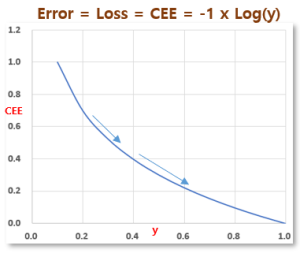

## 수치 미분(numerical difference)

1. 미분 = 접선의 기울기 = $(\frac{\partial f}{\partial x} = \frac{f(x+h) - f(x-h)}{2 \times h})$ (단, $h=0.001$ 정도의 작은 값)
2. 수학적으로는 $h \to 0$에 대해 계산
3. 변수가 여러 개일 경우 각각에 대해 동일한 방식으로 미분 수행

### 수치 미분을 사용하는 이유?
실제 상황에서는 함수식이 없고 함수값(데이터)만 있는 경우가 많기 때문에 수치 미분으로 계산한다.<br/>

**정확한 미분식 vs 수치 미분 비교표**
| 항목 | 정확한 미분식 (Analytical Derivative) | 수치 미분 (Numerical Derivative) |
|------|----------------------------------------|----------------------------------|
| **정의** | 함수의 수식을 미적분 규칙에 따라 미분 | 함수값을 이용해 기울기를 근사 |
| **필요 조건** | 함수식이 존재해야 함 | 함수값만 있으면 됨 |
| **정확도** | 오차 없음 (수학적으로 정확) | 약간의 오차 있음 (h 크기에 따라 달라짐) |
| **계산 방법** | 미분 공식, 연산 규칙 사용 | ex: $\frac{f(x+h) - f(x-h)}{2h}$ |
| **사용 예시** | $f(x) = x² → f'(x) = 2x$ | $f(2.001), f(1.999)$로 기울기 계산 |
| **장점** | 매우 정확, 이론적 근거 확실 | 수식 없이도 사용 가능, 간단 |
| **단점** | 수식이 복잡하면 계산 어려움 | 오차 존재, 민감도 조절 필요 |
| **사용 상황** | 수학적 분석, 알고리즘 구현 등 | 실측 데이터 분석, 시뮬레이션, 센서 처리 등 |

### 매개변수(W)에 대한 손실함수(L)의 변화율: $gradient = \frac{\partial L}{\partial W}$

1. 주어진 입력(x)에 대해 추론치 y 계산: $y = softmax(x \cdot W)$

2. 추론치(y)와 레이블(t)의 차이에 해당하는 손실함수 L 계산: $L = -\sum [t \cdot \log(y + \delta)] \,/\, N$

3. 매개변수에 대한 손실함수의 기울기: $\frac{\partial L}{\partial W} = \frac{L(W + h) - L(W - h)}{2 \times h}$

4. 매개변수의 원소 개수와 변화율(기울기)의 원소 개수는 동일

5. 추후 이 변화율(기울기)를 이용해 매개변수 최적화(손실값이 최소화되는 매개변수): **경사하강법**

### 경사법(gradient method): 손실함수가 감소하는 방향으로 매개변수를 이동시켜 최적화

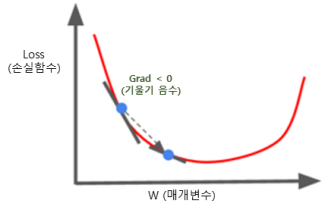

$$
W_{\text{next}} = W_{\text{previous}} - \eta \times \frac{\partial L}{\partial W}
$$

* 기울기가 음수인 경우 더 큰 값의 W로 이동하면서 Loss는 점차 감소
* 기울기가 양수인 경우 더 작은 값의 W로 이동하면서 Loss는 점차 감소
* 학습율($\eta$)이 클수록 빠르게 이동


1. $W_{\text{next}} = W_{\text{previous}} - \eta \times \frac{\partial L}{\partial W}$<br/>단, $\eta$(에타): 학습률(Learning Rate) = 0.001 정도
2. 기울기에 비례하는 값으로 매개변수를 조금씩 변화시키면서 손실값이 최소가 되는 매개변수로 최적화
3. 학습률이 클수록 빠르게 수렴하나 정확도는 떨어짐

-----
## 예제 풀이
예제 1: 레이블 t = (0, 0, 0, 1)일 때,<br/>
(1) 아래와 같은 추론치 y1, y2에 대한 MSE와 CEE를 계산하시오.<br/>
(2) y1에 대한 손실값보다 y2에 대한 손실값이 줄어든 이유는 무엇인가?<br/>
* y2가 y1보다 정답에 더 가까운 예측을 했기 때문이다.
```python
y1 = [0.2, 0.1, 0.1, 0.6] → 정답 클래스(4번째)의 예측 확률: 0.6
y2 = [0.1, 0.1, 0.0, 0.8] → 정답 클래스(4번째)의 예측 확률: 0.8
t  = [0,   0,   0,   1]   → 정답: 4번째 클래스 (index 3)
```

In [132]:
import numpy as np

# 평균 제곱 오차(MSE, Mean Square Error) 계산 함수
def mse(y, t):
    return np.sum((y - t) ** 2) / len(y)

# 교차 엔트로피 오차(CEE, Cross Entropy Error) 계산 함수
def cee(y, t):
    delta = 1e-7 # 로그 계산 시 0을 방지하기 위한 작은 값(수치 안정성 확보)
    return -np.sum(t * np.log(y + delta)) / len(y)

y1 = np.array([0.2, 0.1, 0.1, 0.6]) # 예측 확률 벡터 1
y2 = np.array([0.1, 0.1, 0.0, 0.8]) # 예측 확률 벡터 2
t = np.array([0, 0, 0, 1]) # 실제 정답

print('mse(y1, t):', mse(y1, t))
print('cee(y1, t):', cee(y1, t))

print('mse(y2, t):', mse(y2, t))
print('cee(y2, t):', cee(y2, t))

mse(y1, t): 0.05500000000000001
cee(y1, t): 0.1277063642748345
mse(y2, t): 0.014999999999999996
cee(y2, t): 0.055785856578554394


예제 2: $y = x^2 + 1$일 때, $x = 2$에서의 $\frac{\partial y}{\partial x}$를 계산하시오.<br/>
힌트: 함수 정의 → x 변화$(\pm h)$ → y 변화율 계산

In [134]:
import numpy as np

def fn(x):
    return x**2 + 1

h = 0.001
x = 2.0
grad = (fn(x + h) - fn(x - h)) / (2 * h)
print(grad)

3.9999999999995595


예제 3: $y = x_0^2 + x_1^2$일 때, $x_0 = 3.0, x_1 = 4.0$에서의 $\frac{\partial y}{\partial x_0}와 \frac{\partial y}{\partial x_1}$를 계산하시오. (단, $h=0.001$)<br/>
힌트: 함수 정의 → $x_0$ 변화 $(\pm h)$ → y 변화율 계산 $(\frac{\partial y}{\partial x_0})$ → $x_1 변화 (\pm h)$ → y 변화율 계산 $(\frac{\partial y}{\partial x_1})$

In [136]:
import numpy as np

def fn(x):
    return x[0]**2 + x[1]**2

h = 0.001
x = np.array([3.0, 4.0])
grad = np.zeros_like(x)

# x[0]에 대한 변화율 계산
tmp = x[0] # 3.0
x[0] = tmp + h
fxh1 = fn(x)
x[0] = tmp - h
fxh2 = fn(x)
x[0] = tmp
grad[0] = (fxh1 - fxh2) / (2 * h)

# x[1]에 대한 변화율 계산
tmp = x[1] # 4.0
x[1] = tmp + h
fxh1 = fn(x)
x[1] = tmp - h
fxh2 = fn(x)
x[1] = tmp
grad[1] = (fxh1 - fxh2) / (2 * h)

print(grad)

[6. 8.]


예제 4: 입력 x = (0.6, 0.9), 추론값 $y = softmax(x \cdot W)$, 레이블 t = (0.0, 0.0, 1.0),
h = 0.001, 매개변수 W = ([1, 3, 2], [1, 4, 5]), 손실함수 = 교차엔트로피오차 일 때,<br/>
매개변수에 대한 손실함수의 변화율 $\frac{\partial L}{\partial W}$를 계산하시오.<br/>
(데이터 개수 N = 1, 입력층 뉴런수 = **2** → W (**2x3**) → 출력층 뉴런수(레이블 차원수) = **3**)

In [138]:
import numpy as np

# 교차 엔트로피 오차(CEE, Cross Entropy Error) 계산 함수
def cee(y, t):
    delta = 1e-7 # log(0) 오류 방지용 작은 값
    return -np.sum(t * np.log(y + delta)) # 정답 레이블과 예측 값의 차이 계산

# 소프트맥스 함수 - 출력층에서 확률 값으로 변환
def softmax(x):
    x = x - np.max(x) # 오버플로우 방지를 위한 정규화
    return np.exp(x) / np.sum(np.exp(x)) # 각 원소의 확률 계산

def gradient(W):
    h = 0.01 # 수치 미분에서 사용할 아주 작은 변화 값
    m, n = W.shape # m: W의 행, n: W의 열
    grad = np.zeros_like(W)

    # W의 각 요소에 대해 수치 미분 진행
    for i in range(m):
        for j in range(n):
            tmp = W[i, j]
            W[i, j] = tmp + h
            y1 = softmax(np.dot(x, W))
            L1 = cee(y1, t)

            W[i, j] = tmp - h
            y2 = softmax(np.dot(x, W))
            L2 = cee(y2, t)
            W[i, j] = tmp

            # 수치 미분 계산
            grad[i, j] = (L1 - L2) / (2 * h)

            print(f"i={i}, j={j}, W{i,j}={W[i,j]}")
            print(f"y1={y1.round(3)}, L1={L1.round(3)}")
            print(f"y2={y2.round(3)}, L2={L2.round(3)}")
            print(f"grad={grad[i,j]}\n")

    return grad

x = np.array([0.6, 0.9]) # 입력 벡터
W = np.array([[1, 3, 2], [-1, 4, 5]]) # 가중치 행렬(2x3)
t = np.array([0.0, 0.0, 1.0]) # 정답 레이블

# 현재 가중치 W에 대한 출력값과 손실 계산
y = softmax(np.dot(x, W)).round(3)
L = cee(y, t).round(3)

# 가중치에 대한 손실 함수의 변화율 계산
grad = gradient(W)

print(f"y = {y}") # 예측 결과
print(f"t = {t}") # 정답 벡터
print(f"CEE = {L}") # 교차 엔트로피 손실 값
print(f"Gradient = {grad}") # 각 가중치에 대한 변화율

i=0, j=0, W(0, 0)=1
y1=[0.001 0.425 0.574], L1=0.556
y2=[0.001 0.425 0.574], L2=0.555
grad=0

i=0, j=1, W(0, 1)=3
y1=[0.001 0.425 0.574], L1=0.556
y2=[0.002 0.289 0.71 ], L2=0.343
grad=10

i=0, j=2, W(0, 2)=2
y1=[0.001 0.425 0.574], L1=0.556
y2=[0.002 0.573 0.425], L2=0.856
grad=-15

i=1, j=0, W(1, 0)=-1
y1=[0.003 0.424 0.572], L1=0.558
y2=[0.001 0.425 0.574], L2=0.556
grad=0

i=1, j=1, W(1, 1)=4
y1=[0.001 0.425 0.574], L1=0.556
y2=[0.002 0.231 0.767], L2=0.265
grad=14

i=1, j=2, W(1, 2)=5
y1=[0.001 0.425 0.574], L1=0.556
y2=[0.002 0.644 0.354], L2=1.04
grad=-24

y = [0.001 0.425 0.574]
t = [0. 0. 1.]
CEE = 0.555
Gradient = [[  0  10 -15]
 [  0  14 -24]]


* 매개변수(parameter)는 행렬로 여러 개의 원소가 포함: $W_{i,j}$

* 손실함수는 오차를 모두 더하여 평균한 값으로 하나의 숫자: $L$

* 기울기는 매개변수와 동일한 크기의 행렬: $Grad_{i,j} = \frac{\partial L}{\partial W_{i,j}}$

* 매개변수 W의 크기와 동일한 크기의 기울기($Grad_{i,j} = \frac{\partial L}{\partial W_{i,j}}$) 행렬이 발생

* $Grad_{i,j} = \frac{\partial L}{\partial W_{i,j}}$: 매개변수 W(행렬)의 각 원소에 대한 손실함수(하나의 숫자)의 기울기(행렬)

* 계산 순서: 매개변수 $W_{i,j}$의 각 원소를 $\pm h$만큼 변화
    → 추론치 변화: $y = softmax(x \cdot W)$ (신경망 출력값)<br/>
    →  오차 변화: `L = cee(y, t)` (손실함수)<br/>
    →  기울기 계산: $Grad_{i,j} = \frac{\partial L}{\partial W_{i,j}}$ (매개변수에 대한 손실함수의 변화율)<br/>
    →  **기울기를 이용하여 매개변수 최적화: 경사하강법(Gradient Descent Method)**